In [ ]:
!nvidia-smi

Sun Jun  6 18:41:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! pip install tensorflow-gpu

In [ ]:
from tensorflow import keras

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X_train.shape,y_train.shape # 60k training images each of size 28*28

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

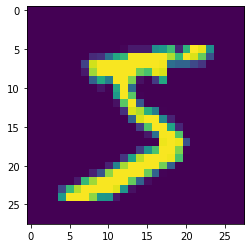

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
def Show_Image(X,Y,index_lst):
  for i in index_lst:
    plt.figure(figsize=(2,12))
    plt.imshow(X[i])
    plt.xlabel(Y[i])
    plt.show()

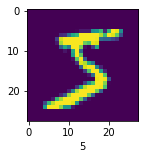

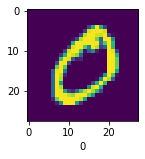

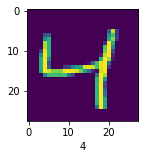

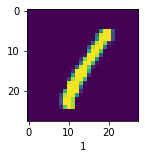

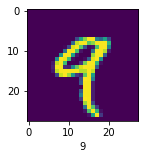

In [ ]:
Show_Image(X_train,y_train,[0,1,2,3,4]) # Displaying few images from the test set

In [ ]:
X_train=X_train/255.

In [ ]:
X_test=X_test/255.

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

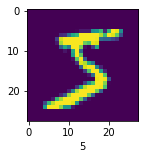

In [ ]:
Show_Image(X_train,y_train,[0])

In [ ]:
# Reshaping the image
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), # kernal_size is the size of the filter
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(80, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=10) # Training accuracy of 99.74%

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1319 - accuracy: 0.9597
Epoch 2/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0442 - accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0299 - accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0233 - accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0165 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0124 - accuracy: 0.9959
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0106 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0080 - accuracy: 0.9972
Epoch 9/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0072 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 43s 23m

In [ ]:
cnn.evaluate(X_test,y_test)# Testing accuracy 99.11%

313/313 [==============================] - 2s 7ms/step - loss: 0.0324 - accuracy: 0.9911


[0.032402195036411285, 0.991100013256073]

In [ ]:
predict_probs=cnn.predict(X_test)

In [ ]:
pred_classes=[np.argmax(i) for i in predict_probs]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pd.DataFrame(confusion_matrix(y_test,pred_classes),columns=[ f"Pred_{i}"for i in set(y_test)],index=[f"Actu_{i}"for i in set(y_test)])

,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4,Pred_5,Pred_6,Pred_7,Pred_8,Pred_9
Actu_0,976,1,0,0,0,0,2,1,0,0
Actu_1,1,1121,4,2,0,1,3,0,2,1
Actu_2,1,0,1027,0,1,0,0,3,0,0
Actu_3,0,0,2,1003,0,4,0,0,1,0
Actu_4,0,0,0,0,976,0,1,0,1,4
Actu_5,2,0,0,4,0,881,4,0,0,1
Actu_6,3,2,0,0,1,1,951,0,0,0
Actu_7,0,1,8,0,0,0,0,1016,1,2
Actu_8,3,0,2,1,0,1,1,1,963,2
Actu_9,0,0,0,0,5,3,0,2,2,997


In [ ]:
from keras.models import load_model
cnn.save('mnist.h5')